In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [3]:
def regresionSimple(x,y):
    """Axusta os datos dos vectore x e y a unha resta dada pola ec. y=a + bx
    Parametros:
    x vector con medidas da magnitud x
    y vector con medidas da magnitud y
    Devolve:
    a coeficiente a
    b coeficiente b
    sa incerteza de a
    sb incerteza de b
    r coeficiente de regresion lineal """
    n=len(x)
    sx=sum(x); sy=sum(y); xx=np.dot(x,x); yy=np.dot(y,y); xy=np.dot(x,y);
    denom=(n*xx - sx**2)
    b=(n*xy - sx*sy)/denom
    a=(xx*sy - sx*xy)/denom
    s=sqrt(sum((y-a-b*x)**2)/(n-2))
    sa=s*sqrt(xx/(n*xx-sx**2))
    sb=s*sqrt(n/(n*xx-sx**2))
    r=(n*xy-sx*sy)/sqrt((n*xx-sx**2)*(n*yy-sy**2))
    return [a,b, sa, sb, r, s]

In [4]:
#Sin dieléctrico

#Datos voltaje fijo

#d(cm)	V(V)	Q(nC)	1/d(cm^-1)	C(F)	C(pF)

v_fijo = np.array([[0.2, 0.22, 0.24, 0.26, 0.28, 0.3], 
                [2.04, 1.84, 1.72, 1.63, 1.49, 1.38], 
                [4.488E-07, 4.048E-07, 3.784E-07, 3.586E-07, 3.278E-07, 3.036E-07], 
                [5, 4.545454545, 4.166666667, 3.846153846, 3.571428571, 3.333333333], 
                [2.992E-10, 2.69867E-10, 2.52267E-10, 2.39067E-10, 2.18533E-10, 2.024E-10], 
                [299.2, 269.8666667, 252.2666667, 239.0666667, 218.5333333, 202.4]])


In [5]:
#Incertidumbres

#Inc de 1/d

s_d1 = 0.02/v_fijo[0]**2

#Inc de Q_0

Cm = 0.22*10**(-6)
s_Vm = 0.02

s_Q0 = Cm * s_Vm
print(s_Q0)

#Inc de C_p

sCp = np.sqrt( (10*v_fijo[4]/1500**2)**2 + (s_Q0/1500)**2)

print(sCp*10**12) #En pF


4.4e-09
[2.93333363 2.93333358 2.93333355 2.93333353 2.93333349 2.93333347]


[1.8482444203691713e-11, 5.602081772792843e-13, 9.939064503699504e-12, 2.4143510477956024e-14, 0.9963058018427245, 3.3639726973035614e-12]
e0=1.0551467523609336e-11 pm 4.547407143381857e-13


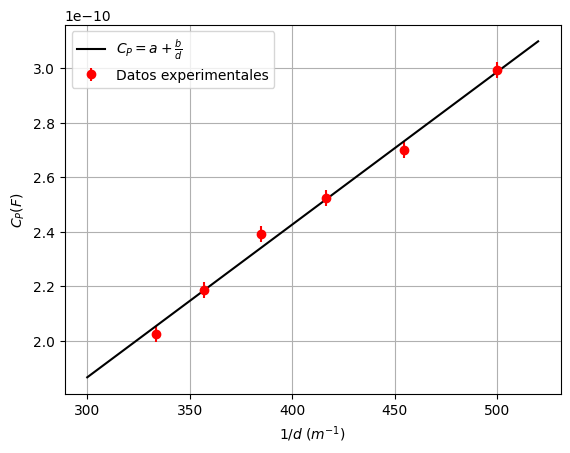

In [6]:
d_1 = 1/(v_fijo[0]/100)

reg1 = regresionSimple(d_1,v_fijo[4]) #Ajuste de C vs 1/d
x = np.linspace(300,520,200)
y = reg1[0] + reg1[1]*x

print(reg1)

plt.errorbar(d_1,v_fijo[4],yerr=sCp,color='red',marker='o',linestyle='None',label='Datos experimentales')
plt.plot(x,y,color='black',label=r'$C_P = a + \frac{b}{d}$')
plt.ylabel(r'$C_P(F)$')
plt.xlabel(r'$1/d\;(m^{-1})$')
plt.legend(loc='upper left')
plt.grid(True)

#Cálculo de epsilon_0

r = 0.13
S = pi*r**2

e0_1 = reg1[1]/S
s_e0_1 = reg1[3]/S

print(f'e0={e0_1} pm {s_e0_1}')

[1.5253333333333324e-07, 1.005714285714287e-10, 1.1051909265493376e-08, 5.67573663893576e-12, 0.9936904306992163, 1.1871654917331045e-08]
e0=4.7356331334190385e-12 pm 3.2757767362030785e-13


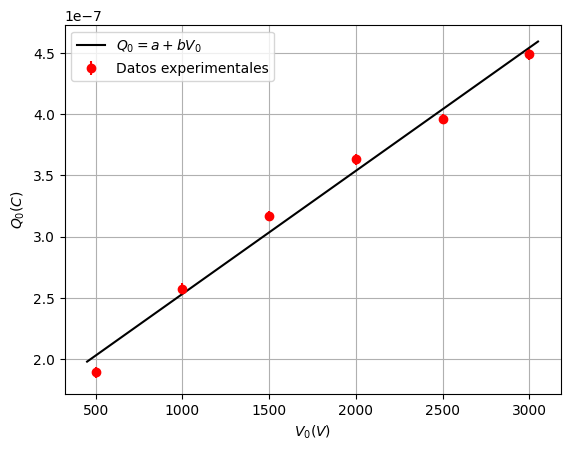

In [7]:
#Datos a distancia fija variando el voltaje

#V0(kV)	Vm(V)		Q0=Vm*Cm(Coulombios)

d_fija = np.array([[0.5, 1, 1.5, 2, 2.5, 3], 
                [0.86, 1.17, 1.44, 1.65, 1.8, 2.04], 
                [1.892E-07, 2.574E-07, 3.168E-07, 0.000000363, 0.000000396, 4.488E-07]])

#Regresion de Q0 vs V0

reg2 = regresionSimple(d_fija[0]*1000,d_fija[2])
x2 = np.linspace(450,3050,200)
y2 = reg2[0] + reg2[1]*x2

print(reg2)

plt.errorbar(d_fija[0]*1000,d_fija[2],yerr=s_Q0,marker='o', linestyle='None',color='red',label='Datos experimentales')
plt.plot(x2,y2,color='black',label=r'$Q_0=a+bV_0$')
plt.xlabel(r'$V_0(V)$')
plt.ylabel(r'$Q_0(C)$')
plt.legend(loc='upper left')
plt.grid(True)

#Cálculo de e0 para d fija

d_fija = 0.0025 #d en metros

e0_2 = reg2[1]*d_fija/S
s_e0_2 = sqrt( (reg2[1]*0.01/100/S)**2 + (d_fija*reg2[3]/S)**2)

print(f'e0={e0_2} pm {s_e0_2}')


In [29]:
#Calculamos un valor medio para e_0

e_0 = np.mean(np.array([e0_1,e0_2]))

w = np.array([1/s_e0_1**2,1/s_e0_2**2]) #Pesos estadísticos para la media ponderada

media_p = np.sum(e_0*w)/np.sum(w)
s_media_p = 1/sqrt(np.sum(w))

print(media_p)
print(s_media_p)

print(media_p/(8.85*10**(-12)))


7.643550328514187e-12
2.6579497042382876e-13
0.8636780032219421


In [18]:
### Dieléctrico

#La distancia está fija, variamos el voltaje V0

#Incertidumbres dieléctrico

s_Vm_d = 0.05

s_Q0_d = s_Vm_d * Cm

print(s_Q0_d)

#V0(kV)	Vm(V)	Q0=Vm*Cm(Coulombios)

diel1 = data = np.array([[1, 2, 3, 4, 5], 
                [0.78, 1.41, 2.51, 3.2, 3.81], 
                [1.716E-07, 3.102E-07, 5.522E-07, 0.000000704, 8.382E-07]])

#Regresion de Q0 vs V0

reg3 = regresionSimple(diel1[0]*1000,diel1[2])
x3 = np.linspace(950,5050,200)
y3= reg3[0] + reg3[1]*x3

print(reg3)


"""plt.plot(diel1[0]*1000,diel1[2],'o',color='red',label='Datos experimentales')
plt.plot(x3,y3,color='black',label=r'$Q_0=a+bV_0$')
plt.xlabel(r'$V_0(V)$')
plt.ylabel(r'$Q_0(C)$')
plt.legend(loc='upper left')
plt.grid(True)"""


1.1e-08
[-2.8600000000000137e-09, 1.7270000000000009e-10, 3.4127902562761287e-08, 1.028994978931706e-11, 0.9947169967227433, 3.253967834301166e-08]


"plt.plot(diel1[0]*1000,diel1[2],'o',color='red',label='Datos experimentales')\nplt.plot(x3,y3,color='black',label=r'$Q_0=a+bV_0$')\nplt.xlabel(r'$V_0(V)$')\nplt.ylabel(r'$Q_0(C)$')\nplt.legend(loc='upper left')\nplt.grid(True)"

In [19]:
# Para comparar con los datos anteriores sacamos el dieléctrico con la misma distancia y hacemos las mismas medidas en el vacío

#V0(kV)	Vm(V)	Q0=Vm*Cm(Coulombios)

diel2 = np.array([[1, 2, 3, 4, 5], 
                [0.32, 0.68, 0.97, 1.26, 1.56], 
                [7.04E-08, 1.496E-07, 2.134E-07, 2.772E-07, 3.432E-07]])

#Regresion de Q0 vs V0

reg4 = regresionSimple(diel2[0]*1000,diel2[2])
x4 = np.linspace(950,5050,200)
y4= reg4[0] + reg4[1]*x4

print(reg4)

"""plt.plot(diel2[0]*1000,diel2[2],'o',color='red',label='Datos experimentales')
plt.plot(x4,y4,color='black',label=r'$Q_0=a+bV_0$')
plt.xlabel(r'$V_0(V)$')
plt.ylabel(r'$Q_0(C)$')
plt.legend(loc='upper left')
plt.grid(True)"""

[8.799999999999955e-09, 6.732000000000002e-11, 5.5248770725389614e-09, 1.6658131147680807e-12, 0.9990828132235398, 5.267763598846606e-09]


"plt.plot(diel2[0]*1000,diel2[2],'o',color='red',label='Datos experimentales')\nplt.plot(x4,y4,color='black',label=r'$Q_0=a+bV_0$')\nplt.xlabel(r'$V_0(V)$')\nplt.ylabel(r'$Q_0(C)$')\nplt.legend(loc='upper left')\nplt.grid(True)"

2.5653594771241837
0.1655086420493256


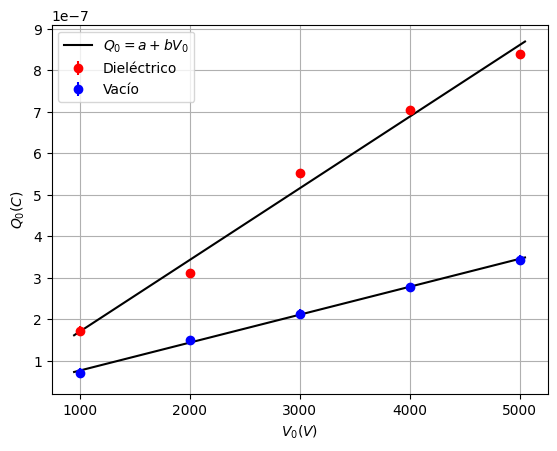

In [23]:
#Comparación de la misma distancia con y sin dieléctrico

plt.errorbar(diel1[0]*1000,diel1[2],yerr=s_Q0_d,marker='o',linestyle='None',color='red',label='Dieléctrico')
plt.plot(x3,y3,color='black',label=r'$Q_0=a+bV_0$')


plt.errorbar(diel2[0]*1000,diel2[2],yerr=s_Q0_d,marker='o',label='Vacío',linestyle='None',color='blue')
plt.plot(x4,y4,color='black')

plt.legend(loc='upper left')
plt.xlabel(r'$V_0(V)$')
plt.ylabel(r'$Q_0(C)$')
plt.grid(True)

#Cálculo de e_r y su incertidumbre

C_diel = reg3[1]
s_C_diel = reg3[3]

C_aire = reg4[1]
s_C_aire = reg4[3]

e_r = C_diel/C_aire
print(e_r)

s_e_r = sqrt( (s_C_diel/C_aire)**2 + (s_C_aire*C_diel/C_aire**2)**2)
print(s_e_r)

